## Learning polynomials with Neural Networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation
from keras import Sequential
import tensorflow as tf
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK
from hyperopt.mongoexp import MongoTrials
from keras.constraints import maxnorm

Using TensorFlow backend.


In [3]:
import numpy
import tensorflow

numpy.random.seed(7)
tensorflow.set_random_seed(2)

In [8]:
data_points = 100
train_data_0 = np.random.uniform(-10, 10, data_points)

mu_train_0, sigma_train_0 = 0, 0
noise_train_0 = np.random.normal(mu_train_0, sigma_train_0, data_points)

train_labels_0_pre = np.power(train_data_0, 3) + noise_train_0

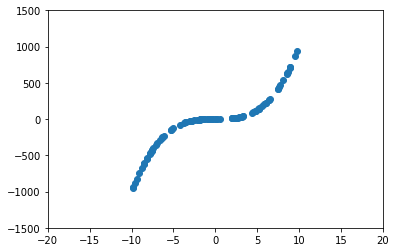

In [9]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_0, train_labels_0_pre)
plt.show()

In [20]:
order = np.argsort(np.random.random(train_labels_0_pre.shape))

pre_train_data_0 = np.array(train_data_0[order]).reshape(data_points, 1)
train_labels_0 = np.array(train_labels_0_pre[order]).reshape(data_points, 1)

mean = pre_train_data_0.mean(axis=0)
std = pre_train_data_0.std(axis=0)

post_train_data_0 = (pre_train_data_0 - mean) / std


In [8]:
unit_numbers = np.linspace(1, 10, 6, dtype=int)
unit_activations = [tf.keras.activations.relu, tf.keras.activations.selu, tf.keras.activations.tanh, 
                    tf.keras.activations.sigmoid, tf.keras.activations.hard_sigmoid]
optimizers = [tf.train.RMSPropOptimizer(learning_rate=0.5), 
              tf.train.AdamOptimizer(1e-4)]
dropout = np.linspace(0.1, 0.5, 6, dtype=float)

In [15]:
space = {
    'choice': hp.choice('layers_number', [{'layers': 'two'}, 
                                          {'layers': 'three',     
                                           'units_3': hp.choice('units_3', unit_numbers),
                                            'units_3_activation': 
                                               hp.choice('units_3_activation', unit_activations),
                                           'dropout_3': hp.choice('dropout_3', dropout)
                                          },
                                              {'layers': 'four',     
                                           'units_4': hp.choice('units_4', unit_numbers),
                                            'units_4_activation': 
                                               hp.choice('units_4_activation', unit_activations),
                                           'dropout_4': hp.choice('dropout_4', dropout)
                                              },
                                            {'layers': 'five',     
                                           'units_5': hp.choice('units_5', unit_numbers),
                                            'units_5_activation': 
                                               hp.choice('units_5_activation', unit_activations),
                                           'dropout_5': hp.choice('dropout_5', dropout)
                                              }]),
    'units_1': hp.choice('units_1', unit_numbers),
    'units_1_activation': hp.choice('units_1_activation', unit_activations),
    'dropout_1': hp.choice('dropout_1', dropout),
    'units_2': hp.choice('units_2', unit_numbers),
    'units_2_activation': hp.choice('units_2_activation', unit_activations),
    'optimizer': hp.choice('optimizer', optimizers) 
}

In [16]:
def build_model_hopt(params):
    print(params)
    EPOCHS = 800
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['units_1'], activation=params['units_1_activation'],
                       input_shape=(post_train_data_0.shape[1],), kernel_constraint=maxnorm(3)))
    model.add(keras.layers.Dropout(params['dropout_1']))
    model.add(keras.layers.Dense(params['units_2'], activation=params['units_2_activation'], 
                                 kernel_constraint=maxnorm(3)))
        
    if params['choice']['layers'] == 'three':
        model.add(keras.layers.Dense(params['choice']['units_3'])) 
        model.add(keras.layers.Dropout(params['choice']['dropout_3']))
    
    if params['choice']['layers'] == 'four':
        model.add(keras.layers.Dense(params['choice']['units_4'])) 
        model.add(keras.layers.Dropout(params['choice']['dropout_4']))
    
    model.add(keras.layers.Dense(1))

    model.compile(loss='mse',
                optimizer=params['optimizer'],
                metrics=['mae'])
    

    model.fit(post_train_data_0, train_labels_0, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)
    
    predicted_0 = model.predict(train_data_0).reshape(data_points, 1)
    
    acc = np.square(np.subtract(predicted_0, train_labels_0_pre)).mean()

    return {'loss': -acc, 'status': STATUS_OK}

{'optimizer': <tensorflow.python.training.rmsprop.RMSPropOptimizer object at 0x122912c18>, 'units_1': 1, 'choice': {'units_4_activation': <function selu at 0x11ea2a598>, 'dropout_4': 0.33999999999999997, 'units_4': 4, 'layers': 'four'}, 'units_2': 6, 'units_2_activation': <function hard_sigmoid at 0x11f48b7b8>, 'dropout_1': 0.5, 'units_1_activation': <function tanh at 0x11f48b6a8>}
Train on 80 samples, validate on 20 samples
Epoch 1/800
80/80 [==============================] - 0s 4ms/step - loss: 94222.6172 - mean_absolute_error: 186.4159 - val_loss: 166947.5938 - val_mean_absolute_error: 290.4507
Epoch 2/800
80/80 [==============================] - 0s 65us/step - loss: 88066.1312 - mean_absolute_error: 186.9441 - val_loss: 176682.7031 - val_mean_absolute_error: 292.9745
Epoch 3/800
80/80 [==============================] - 0s 54us/step - loss: 95896.6062 - mean_absolute_error: 194.5385 - val_loss: 150694.3750 - val_mean_absolute_error: 267.7960
Epoch 4/800
80/80 [======================

Epoch 44/800
80/80 [==============================] - 0s 71us/step - loss: 73148.7156 - mean_absolute_error: 175.1362 - val_loss: 91305.2891 - val_mean_absolute_error: 220.2931
Epoch 45/800
80/80 [==============================] - 0s 65us/step - loss: 75498.5750 - mean_absolute_error: 183.7772 - val_loss: 96675.3516 - val_mean_absolute_error: 234.7378
Epoch 46/800
80/80 [==============================] - 0s 87us/step - loss: 72642.5781 - mean_absolute_error: 186.9965 - val_loss: 100080.8125 - val_mean_absolute_error: 223.3146
Epoch 47/800
80/80 [==============================] - 0s 62us/step - loss: 79995.1375 - mean_absolute_error: 189.3557 - val_loss: 98022.3594 - val_mean_absolute_error: 219.2313
Epoch 48/800
80/80 [==============================] - 0s 55us/step - loss: 88322.7625 - mean_absolute_error: 187.4648 - val_loss: 124558.4531 - val_mean_absolute_error: 248.4435
Epoch 49/800
80/80 [==============================] - 0s 53us/step - loss: 78612.8000 - mean_absolute_error: 173.

80/80 [==============================] - 0s 48us/step - loss: 62668.6391 - mean_absolute_error: 160.1132 - val_loss: 127117.3359 - val_mean_absolute_error: 250.0674
Epoch 91/800
80/80 [==============================] - 0s 60us/step - loss: 74612.6813 - mean_absolute_error: 167.4924 - val_loss: 132900.7031 - val_mean_absolute_error: 256.1170
Epoch 92/800
80/80 [==============================] - 0s 64us/step - loss: 74251.5813 - mean_absolute_error: 182.9682 - val_loss: 143434.5938 - val_mean_absolute_error: 268.2129
Epoch 93/800
80/80 [==============================] - 0s 56us/step - loss: 86380.3531 - mean_absolute_error: 182.9725 - val_loss: 124938.9141 - val_mean_absolute_error: 243.3645
Epoch 94/800
80/80 [==============================] - 0s 64us/step - loss: 86616.4570 - mean_absolute_error: 193.0201 - val_loss: 131665.4688 - val_mean_absolute_error: 253.5401
Epoch 95/800
80/80 [==============================] - 0s 61us/step - loss: 72934.3750 - mean_absolute_error: 183.0836 - val

Epoch 136/800
80/80 [==============================] - 0s 49us/step - loss: 73289.5828 - mean_absolute_error: 163.1077 - val_loss: 119063.7656 - val_mean_absolute_error: 240.8323
Epoch 137/800
80/80 [==============================] - 0s 50us/step - loss: 66506.1141 - mean_absolute_error: 159.5288 - val_loss: 131283.1250 - val_mean_absolute_error: 270.1857
Epoch 138/800
80/80 [==============================] - 0s 63us/step - loss: 68828.7750 - mean_absolute_error: 157.3458 - val_loss: 176940.6250 - val_mean_absolute_error: 303.6724
Epoch 139/800
80/80 [==============================] - 0s 74us/step - loss: 90223.8844 - mean_absolute_error: 194.1525 - val_loss: 112093.1875 - val_mean_absolute_error: 247.6341
Epoch 140/800
80/80 [==============================] - 0s 57us/step - loss: 99511.6344 - mean_absolute_error: 192.3374 - val_loss: 176724.8906 - val_mean_absolute_error: 300.3077
Epoch 141/800
80/80 [==============================] - 0s 55us/step - loss: 94809.8484 - mean_absolute_er

Epoch 182/800
80/80 [==============================] - 0s 67us/step - loss: 94829.9766 - mean_absolute_error: 186.7433 - val_loss: 177407.7344 - val_mean_absolute_error: 308.4945
Epoch 183/800
80/80 [==============================] - 0s 68us/step - loss: 95052.7469 - mean_absolute_error: 189.9800 - val_loss: 177135.5312 - val_mean_absolute_error: 305.9233
Epoch 184/800
80/80 [==============================] - 0s 64us/step - loss: 94923.5219 - mean_absolute_error: 187.7294 - val_loss: 176900.5938 - val_mean_absolute_error: 303.1418
Epoch 185/800
80/80 [==============================] - 0s 78us/step - loss: 94409.5000 - mean_absolute_error: 186.9869 - val_loss: 176851.4531 - val_mean_absolute_error: 302.4451
Epoch 186/800
80/80 [==============================] - 0s 69us/step - loss: 94315.9250 - mean_absolute_error: 186.8921 - val_loss: 176815.6875 - val_mean_absolute_error: 301.8999
Epoch 187/800
80/80 [==============================] - 0s 69us/step - loss: 94006.2219 - mean_absolute_er

Epoch 228/800
80/80 [==============================] - 0s 80us/step - loss: 93726.3000 - mean_absolute_error: 187.1702 - val_loss: 177867.2500 - val_mean_absolute_error: 312.0219
Epoch 229/800
80/80 [==============================] - 0s 74us/step - loss: 94553.9297 - mean_absolute_error: 189.3133 - val_loss: 177205.2188 - val_mean_absolute_error: 306.6317
Epoch 230/800
80/80 [==============================] - 0s 57us/step - loss: 94632.7031 - mean_absolute_error: 188.3617 - val_loss: 177102.7188 - val_mean_absolute_error: 305.5751
Epoch 231/800
80/80 [==============================] - 0s 54us/step - loss: 93951.0703 - mean_absolute_error: 187.2755 - val_loss: 177046.0938 - val_mean_absolute_error: 304.9478
Epoch 232/800
80/80 [==============================] - 0s 81us/step - loss: 94203.4141 - mean_absolute_error: 187.1184 - val_loss: 177031.5000 - val_mean_absolute_error: 304.7804
Epoch 233/800
80/80 [==============================] - 0s 64us/step - loss: 94065.8469 - mean_absolute_er

Epoch 274/800
80/80 [==============================] - 0s 55us/step - loss: 93814.7543 - mean_absolute_error: 188.8489 - val_loss: 177244.1719 - val_mean_absolute_error: 307.0104
Epoch 275/800
80/80 [==============================] - 0s 53us/step - loss: 94372.7922 - mean_absolute_error: 188.6622 - val_loss: 177201.3125 - val_mean_absolute_error: 306.5929
Epoch 276/800
80/80 [==============================] - 0s 67us/step - loss: 94403.9563 - mean_absolute_error: 187.9885 - val_loss: 177057.9375 - val_mean_absolute_error: 305.0820
Epoch 277/800
80/80 [==============================] - 0s 61us/step - loss: 94178.9969 - mean_absolute_error: 187.5461 - val_loss: 177201.4531 - val_mean_absolute_error: 306.5942
Epoch 278/800
80/80 [==============================] - 0s 71us/step - loss: 94297.6602 - mean_absolute_error: 187.3873 - val_loss: 177045.8594 - val_mean_absolute_error: 304.9454
Epoch 279/800
80/80 [==============================] - 0s 75us/step - loss: 94080.9219 - mean_absolute_er

Epoch 320/800
80/80 [==============================] - 0s 70us/step - loss: 93895.4703 - mean_absolute_error: 188.4744 - val_loss: 177266.0938 - val_mean_absolute_error: 307.2190
Epoch 321/800
80/80 [==============================] - 0s 79us/step - loss: 94915.3500 - mean_absolute_error: 188.8859 - val_loss: 177367.4219 - val_mean_absolute_error: 308.1431
Epoch 322/800
80/80 [==============================] - 0s 64us/step - loss: 94407.2422 - mean_absolute_error: 188.4576 - val_loss: 177175.5781 - val_mean_absolute_error: 306.3351
Epoch 323/800
80/80 [==============================] - 0s 59us/step - loss: 94320.7297 - mean_absolute_error: 187.9815 - val_loss: 177525.4531 - val_mean_absolute_error: 309.4748
Epoch 324/800
80/80 [==============================] - 0s 75us/step - loss: 93975.4156 - mean_absolute_error: 190.9501 - val_loss: 177172.2344 - val_mean_absolute_error: 306.3014
Epoch 325/800
80/80 [==============================] - 0s 64us/step - loss: 94485.9641 - mean_absolute_er

Epoch 366/800
80/80 [==============================] - 0s 71us/step - loss: 94198.1203 - mean_absolute_error: 188.4556 - val_loss: 177102.2031 - val_mean_absolute_error: 305.5694
Epoch 367/800
80/80 [==============================] - 0s 77us/step - loss: 94209.3953 - mean_absolute_error: 186.9613 - val_loss: 177049.8750 - val_mean_absolute_error: 304.9908
Epoch 368/800
80/80 [==============================] - 0s 66us/step - loss: 93911.9070 - mean_absolute_error: 187.3099 - val_loss: 177060.2812 - val_mean_absolute_error: 305.1084
Epoch 369/800
80/80 [==============================] - 0s 66us/step - loss: 94099.4313 - mean_absolute_error: 186.9418 - val_loss: 177078.0000 - val_mean_absolute_error: 305.3056
Epoch 370/800
80/80 [==============================] - 0s 72us/step - loss: 94730.0156 - mean_absolute_error: 186.7495 - val_loss: 177499.9531 - val_mean_absolute_error: 309.2677
Epoch 371/800
80/80 [==============================] - 0s 69us/step - loss: 94232.2063 - mean_absolute_er

Epoch 412/800
80/80 [==============================] - 0s 71us/step - loss: 94024.6750 - mean_absolute_error: 186.9589 - val_loss: 177025.3281 - val_mean_absolute_error: 304.7086
Epoch 413/800
80/80 [==============================] - 0s 66us/step - loss: 93967.7969 - mean_absolute_error: 187.0165 - val_loss: 177109.6094 - val_mean_absolute_error: 305.6491
Epoch 414/800
80/80 [==============================] - 0s 79us/step - loss: 94132.7117 - mean_absolute_error: 187.4839 - val_loss: 177009.5938 - val_mean_absolute_error: 304.5237
Epoch 415/800
80/80 [==============================] - 0s 66us/step - loss: 94036.8078 - mean_absolute_error: 186.9797 - val_loss: 176997.3438 - val_mean_absolute_error: 304.3776
Epoch 416/800
80/80 [==============================] - 0s 84us/step - loss: 93954.2937 - mean_absolute_error: 186.7832 - val_loss: 177063.0000 - val_mean_absolute_error: 305.1389
Epoch 417/800
80/80 [==============================] - 0s 74us/step - loss: 94034.6102 - mean_absolute_er

Epoch 458/800
80/80 [==============================] - 0s 63us/step - loss: 94604.7656 - mean_absolute_error: 187.2743 - val_loss: 177174.5312 - val_mean_absolute_error: 306.3248
Epoch 459/800
80/80 [==============================] - 0s 77us/step - loss: 94542.4250 - mean_absolute_error: 189.4355 - val_loss: 176844.2969 - val_mean_absolute_error: 302.3391
Epoch 460/800
80/80 [==============================] - 0s 70us/step - loss: 95159.0219 - mean_absolute_error: 188.3231 - val_loss: 176961.5312 - val_mean_absolute_error: 303.9380
Epoch 461/800
80/80 [==============================] - 0s 81us/step - loss: 94061.6570 - mean_absolute_error: 186.5943 - val_loss: 176928.6562 - val_mean_absolute_error: 303.5168
Epoch 462/800
80/80 [==============================] - 0s 65us/step - loss: 93837.3209 - mean_absolute_error: 185.7750 - val_loss: 176874.8438 - val_mean_absolute_error: 302.7836
Epoch 463/800
80/80 [==============================] - 0s 69us/step - loss: 94427.4219 - mean_absolute_er

Epoch 504/800
80/80 [==============================] - 0s 66us/step - loss: 93971.4437 - mean_absolute_error: 187.7295 - val_loss: 177279.4844 - val_mean_absolute_error: 307.3448
Epoch 505/800
80/80 [==============================] - 0s 72us/step - loss: 94077.1781 - mean_absolute_error: 188.4227 - val_loss: 177231.1562 - val_mean_absolute_error: 306.8850
Epoch 506/800
80/80 [==============================] - 0s 53us/step - loss: 93972.7703 - mean_absolute_error: 187.7666 - val_loss: 177323.4062 - val_mean_absolute_error: 307.7493
Epoch 507/800
80/80 [==============================] - 0s 60us/step - loss: 94549.9531 - mean_absolute_error: 189.9306 - val_loss: 177201.2188 - val_mean_absolute_error: 306.5920
Epoch 508/800
80/80 [==============================] - 0s 74us/step - loss: 93971.0957 - mean_absolute_error: 187.6862 - val_loss: 177197.7344 - val_mean_absolute_error: 306.5575
Epoch 509/800
80/80 [==============================] - 0s 77us/step - loss: 93984.9625 - mean_absolute_er

Epoch 550/800
80/80 [==============================] - 0s 75us/step - loss: 93851.1562 - mean_absolute_error: 185.8724 - val_loss: 176646.1562 - val_mean_absolute_error: 298.4941
Epoch 551/800
80/80 [==============================] - 0s 76us/step - loss: 95676.4938 - mean_absolute_error: 186.3134 - val_loss: 176997.6562 - val_mean_absolute_error: 304.3817
Epoch 552/800
80/80 [==============================] - 0s 63us/step - loss: 93716.1594 - mean_absolute_error: 186.5692 - val_loss: 176923.6094 - val_mean_absolute_error: 303.4504
Epoch 553/800
80/80 [==============================] - 0s 60us/step - loss: 94092.1789 - mean_absolute_error: 185.8114 - val_loss: 176937.8438 - val_mean_absolute_error: 303.6362
Epoch 554/800
80/80 [==============================] - 0s 81us/step - loss: 93678.4516 - mean_absolute_error: 185.8811 - val_loss: 176759.5781 - val_mean_absolute_error: 300.9590
Epoch 555/800
80/80 [==============================] - 0s 79us/step - loss: 94558.7937 - mean_absolute_er

Epoch 596/800
80/80 [==============================] - 0s 70us/step - loss: 94022.4141 - mean_absolute_error: 187.6207 - val_loss: 177224.4531 - val_mean_absolute_error: 306.8200
Epoch 597/800
80/80 [==============================] - 0s 80us/step - loss: 94154.3203 - mean_absolute_error: 188.1424 - val_loss: 177221.7500 - val_mean_absolute_error: 306.7937
Epoch 598/800
80/80 [==============================] - 0s 83us/step - loss: 94026.2812 - mean_absolute_error: 187.8512 - val_loss: 177169.4688 - val_mean_absolute_error: 306.2733
Epoch 599/800
80/80 [==============================] - 0s 63us/step - loss: 94068.3891 - mean_absolute_error: 187.5495 - val_loss: 177472.2500 - val_mean_absolute_error: 309.0397
Epoch 600/800
80/80 [==============================] - 0s 51us/step - loss: 94055.7000 - mean_absolute_error: 188.1126 - val_loss: 177404.2188 - val_mean_absolute_error: 308.4641
Epoch 601/800
80/80 [==============================] - 0s 57us/step - loss: 94245.1031 - mean_absolute_er

Epoch 642/800
80/80 [==============================] - 0s 81us/step - loss: 93249.5297 - mean_absolute_error: 185.7648 - val_loss: 176759.2812 - val_mean_absolute_error: 300.9538
Epoch 643/800
80/80 [==============================] - 0s 68us/step - loss: 95169.5516 - mean_absolute_error: 188.1044 - val_loss: 177001.9844 - val_mean_absolute_error: 304.4333
Epoch 644/800
80/80 [==============================] - 0s 90us/step - loss: 93761.8969 - mean_absolute_error: 186.8603 - val_loss: 176661.7969 - val_mean_absolute_error: 298.9077
Epoch 645/800
80/80 [==============================] - 0s 68us/step - loss: 95052.5891 - mean_absolute_error: 186.9505 - val_loss: 176732.9219 - val_mean_absolute_error: 300.4642
Epoch 646/800
80/80 [==============================] - 0s 88us/step - loss: 93936.0578 - mean_absolute_error: 185.4772 - val_loss: 176747.9844 - val_mean_absolute_error: 300.7482
Epoch 647/800
80/80 [==============================] - 0s 65us/step - loss: 93393.4375 - mean_absolute_er

Epoch 688/800
80/80 [==============================] - 0s 78us/step - loss: 93979.5875 - mean_absolute_error: 187.5763 - val_loss: 177177.2188 - val_mean_absolute_error: 306.3519
Epoch 689/800
80/80 [==============================] - 0s 62us/step - loss: 93975.1922 - mean_absolute_error: 187.5742 - val_loss: 177163.8594 - val_mean_absolute_error: 306.2162
Epoch 690/800
80/80 [==============================] - 0s 67us/step - loss: 93969.3500 - mean_absolute_error: 187.5193 - val_loss: 177172.4688 - val_mean_absolute_error: 306.3036
Epoch 691/800
80/80 [==============================] - 0s 81us/step - loss: 94047.5563 - mean_absolute_error: 187.5659 - val_loss: 177084.3438 - val_mean_absolute_error: 305.3752
Epoch 692/800
80/80 [==============================] - 0s 76us/step - loss: 93870.7594 - mean_absolute_error: 187.1841 - val_loss: 177169.8281 - val_mean_absolute_error: 306.2770
Epoch 693/800
80/80 [==============================] - 0s 77us/step - loss: 94228.1984 - mean_absolute_er

Epoch 734/800
80/80 [==============================] - 0s 77us/step - loss: 93974.4094 - mean_absolute_error: 186.9704 - val_loss: 177072.1250 - val_mean_absolute_error: 305.2405
Epoch 735/800
80/80 [==============================] - 0s 73us/step - loss: 93989.1539 - mean_absolute_error: 187.1151 - val_loss: 177069.0781 - val_mean_absolute_error: 305.2066
Epoch 736/800
80/80 [==============================] - 0s 71us/step - loss: 93971.3094 - mean_absolute_error: 187.0797 - val_loss: 177082.7812 - val_mean_absolute_error: 305.3580
Epoch 737/800
80/80 [==============================] - 0s 83us/step - loss: 94003.0352 - mean_absolute_error: 187.1348 - val_loss: 177073.8438 - val_mean_absolute_error: 305.2596
Epoch 738/800
80/80 [==============================] - 0s 73us/step - loss: 93973.3629 - mean_absolute_error: 187.1391 - val_loss: 177067.8594 - val_mean_absolute_error: 305.1931
Epoch 739/800
80/80 [==============================] - 0s 83us/step - loss: 93962.0988 - mean_absolute_er

Epoch 780/800
80/80 [==============================] - 0s 73us/step - loss: 94027.2156 - mean_absolute_error: 186.6972 - val_loss: 177008.0781 - val_mean_absolute_error: 304.5060
Epoch 781/800
80/80 [==============================] - 0s 86us/step - loss: 93989.3516 - mean_absolute_error: 186.8530 - val_loss: 177022.8750 - val_mean_absolute_error: 304.6802
Epoch 782/800
80/80 [==============================] - 0s 74us/step - loss: 93975.4156 - mean_absolute_error: 186.8821 - val_loss: 177040.0312 - val_mean_absolute_error: 304.8785
Epoch 783/800
80/80 [==============================] - 0s 70us/step - loss: 93975.8734 - mean_absolute_error: 186.9862 - val_loss: 177552.9531 - val_mean_absolute_error: 309.6950
Epoch 784/800
80/80 [==============================] - 0s 73us/step - loss: 94366.8656 - mean_absolute_error: 188.6596 - val_loss: 177074.0469 - val_mean_absolute_error: 305.2618
Epoch 785/800
80/80 [==============================] - 0s 68us/step - loss: 93987.6078 - mean_absolute_er

Epoch 24/800
80/80 [==============================] - 0s 70us/step - loss: 60518.1828 - mean_absolute_error: 162.4614 - val_loss: 83546.5859 - val_mean_absolute_error: 217.7926
Epoch 25/800
80/80 [==============================] - 0s 76us/step - loss: 65903.5945 - mean_absolute_error: 185.4010 - val_loss: 96384.0156 - val_mean_absolute_error: 224.7107
Epoch 26/800
80/80 [==============================] - 0s 64us/step - loss: 94913.6250 - mean_absolute_error: 203.3827 - val_loss: 111366.6641 - val_mean_absolute_error: 242.7249
Epoch 27/800
80/80 [==============================] - 0s 82us/step - loss: 70689.2937 - mean_absolute_error: 171.1228 - val_loss: 112071.6641 - val_mean_absolute_error: 239.8479
Epoch 28/800
80/80 [==============================] - 0s 75us/step - loss: 66818.8695 - mean_absolute_error: 165.7201 - val_loss: 99889.9766 - val_mean_absolute_error: 232.8033
Epoch 29/800
80/80 [==============================] - 0s 73us/step - loss: 64467.7211 - mean_absolute_error: 168.

80/80 [==============================] - 0s 57us/step - loss: 77309.6922 - mean_absolute_error: 180.5910 - val_loss: 102593.1406 - val_mean_absolute_error: 227.7894
Epoch 117/800
80/80 [==============================] - 0s 56us/step - loss: 60868.5117 - mean_absolute_error: 154.3939 - val_loss: 99015.6719 - val_mean_absolute_error: 225.3190
Epoch 118/800
80/80 [==============================] - 0s 67us/step - loss: 59351.7109 - mean_absolute_error: 153.9996 - val_loss: 83004.1406 - val_mean_absolute_error: 216.1114
Epoch 119/800
80/80 [==============================] - 0s 62us/step - loss: 77505.5734 - mean_absolute_error: 191.4060 - val_loss: 95786.5312 - val_mean_absolute_error: 229.0321
Epoch 120/800
80/80 [==============================] - 0s 60us/step - loss: 79216.3969 - mean_absolute_error: 188.0022 - val_loss: 103996.9609 - val_mean_absolute_error: 233.9818
Epoch 121/800
80/80 [==============================] - 0s 64us/step - loss: 70143.0668 - mean_absolute_error: 179.5535 - v

80/80 [==============================] - 0s 69us/step - loss: 62880.9195 - mean_absolute_error: 183.5137 - val_loss: 93278.1328 - val_mean_absolute_error: 230.1276
Epoch 163/800
80/80 [==============================] - 0s 51us/step - loss: 61210.2469 - mean_absolute_error: 180.8024 - val_loss: 168537.2344 - val_mean_absolute_error: 295.4359
Epoch 164/800
80/80 [==============================] - 0s 50us/step - loss: 87963.7937 - mean_absolute_error: 210.9679 - val_loss: 100877.9141 - val_mean_absolute_error: 231.7315
Epoch 165/800
80/80 [==============================] - 0s 60us/step - loss: 66766.7383 - mean_absolute_error: 165.4128 - val_loss: 98403.3828 - val_mean_absolute_error: 229.0713
Epoch 166/800
80/80 [==============================] - 0s 58us/step - loss: 71055.7656 - mean_absolute_error: 185.3250 - val_loss: 104843.9531 - val_mean_absolute_error: 233.7050
Epoch 167/800
80/80 [==============================] - 0s 62us/step - loss: 71791.1094 - mean_absolute_error: 184.8730 - 

Epoch 208/800
80/80 [==============================] - 0s 54us/step - loss: 95526.3156 - mean_absolute_error: 189.3088 - val_loss: 177549.0469 - val_mean_absolute_error: 309.6645
Epoch 209/800
80/80 [==============================] - 0s 75us/step - loss: 94901.9125 - mean_absolute_error: 189.8380 - val_loss: 177307.3125 - val_mean_absolute_error: 307.6034
Epoch 210/800
80/80 [==============================] - 0s 56us/step - loss: 94367.5094 - mean_absolute_error: 187.6700 - val_loss: 177018.9688 - val_mean_absolute_error: 304.6352
Epoch 211/800
80/80 [==============================] - 0s 53us/step - loss: 94286.6547 - mean_absolute_error: 186.0967 - val_loss: 177046.7344 - val_mean_absolute_error: 304.9559
Epoch 212/800
80/80 [==============================] - 0s 51us/step - loss: 94574.4781 - mean_absolute_error: 187.1546 - val_loss: 177159.5625 - val_mean_absolute_error: 306.1727
Epoch 213/800
80/80 [==============================] - 0s 59us/step - loss: 94233.8063 - mean_absolute_er

Epoch 254/800
80/80 [==============================] - 0s 55us/step - loss: 65905.2203 - mean_absolute_error: 166.9092 - val_loss: 107602.6719 - val_mean_absolute_error: 237.7338
Epoch 255/800
80/80 [==============================] - 0s 64us/step - loss: 69805.0672 - mean_absolute_error: 176.9112 - val_loss: 98425.3906 - val_mean_absolute_error: 235.6344
Epoch 256/800
80/80 [==============================] - 0s 80us/step - loss: 62848.5828 - mean_absolute_error: 169.4721 - val_loss: 94677.2500 - val_mean_absolute_error: 234.5189
Epoch 257/800
80/80 [==============================] - 0s 56us/step - loss: 65017.1828 - mean_absolute_error: 175.3467 - val_loss: 87116.5625 - val_mean_absolute_error: 226.7122
Epoch 258/800
80/80 [==============================] - 0s 50us/step - loss: 67460.6891 - mean_absolute_error: 169.7598 - val_loss: 91682.1953 - val_mean_absolute_error: 221.4900
Epoch 259/800
80/80 [==============================] - 0s 54us/step - loss: 69847.0375 - mean_absolute_error:

Epoch 300/800
80/80 [==============================] - 0s 64us/step - loss: 79052.7047 - mean_absolute_error: 178.4727 - val_loss: 111535.0625 - val_mean_absolute_error: 240.6020
Epoch 301/800
80/80 [==============================] - 0s 72us/step - loss: 71241.1000 - mean_absolute_error: 169.4748 - val_loss: 102534.5156 - val_mean_absolute_error: 233.1744
Epoch 302/800
80/80 [==============================] - 0s 66us/step - loss: 78985.0531 - mean_absolute_error: 191.0664 - val_loss: 111668.9844 - val_mean_absolute_error: 238.1365
Epoch 303/800
80/80 [==============================] - 0s 68us/step - loss: 70859.4805 - mean_absolute_error: 167.5618 - val_loss: 98509.5938 - val_mean_absolute_error: 229.3132
Epoch 304/800
80/80 [==============================] - 0s 75us/step - loss: 61464.8000 - mean_absolute_error: 163.6769 - val_loss: 100382.8906 - val_mean_absolute_error: 228.0743
Epoch 305/800
80/80 [==============================] - 0s 70us/step - loss: 67910.3125 - mean_absolute_err

Epoch 346/800
80/80 [==============================] - 0s 60us/step - loss: 90234.5211 - mean_absolute_error: 186.1356 - val_loss: 176783.9062 - val_mean_absolute_error: 291.5530
Epoch 347/800
80/80 [==============================] - 0s 71us/step - loss: 91654.7063 - mean_absolute_error: 175.6854 - val_loss: 176102.9062 - val_mean_absolute_error: 293.3323
Epoch 348/800
80/80 [==============================] - 0s 51us/step - loss: 89946.7672 - mean_absolute_error: 181.0537 - val_loss: 126086.2969 - val_mean_absolute_error: 257.2074
Epoch 349/800
80/80 [==============================] - 0s 49us/step - loss: 70798.8719 - mean_absolute_error: 164.5353 - val_loss: 119731.1406 - val_mean_absolute_error: 244.5530
Epoch 350/800
80/80 [==============================] - 0s 52us/step - loss: 58542.6695 - mean_absolute_error: 144.0477 - val_loss: 97626.7969 - val_mean_absolute_error: 228.8380
Epoch 351/800
80/80 [==============================] - 0s 60us/step - loss: 64730.4953 - mean_absolute_err

Epoch 392/800
80/80 [==============================] - 0s 56us/step - loss: 63495.8484 - mean_absolute_error: 173.2481 - val_loss: 99964.0469 - val_mean_absolute_error: 236.3119
Epoch 393/800
80/80 [==============================] - 0s 57us/step - loss: 61686.7391 - mean_absolute_error: 168.6664 - val_loss: 94350.3984 - val_mean_absolute_error: 234.3486
Epoch 394/800
80/80 [==============================] - 0s 66us/step - loss: 69711.9469 - mean_absolute_error: 185.4541 - val_loss: 105181.6250 - val_mean_absolute_error: 238.3002
Epoch 395/800
80/80 [==============================] - 0s 86us/step - loss: 60383.8609 - mean_absolute_error: 178.0413 - val_loss: 99152.6094 - val_mean_absolute_error: 236.2099
Epoch 396/800
80/80 [==============================] - 0s 58us/step - loss: 60455.6664 - mean_absolute_error: 182.2157 - val_loss: 102898.2891 - val_mean_absolute_error: 236.5182
Epoch 397/800
80/80 [==============================] - 0s 59us/step - loss: 76930.4000 - mean_absolute_error

Epoch 438/800
80/80 [==============================] - 0s 94us/step - loss: 76744.0922 - mean_absolute_error: 177.0859 - val_loss: 83170.0781 - val_mean_absolute_error: 210.6997
Epoch 439/800
80/80 [==============================] - 0s 89us/step - loss: 80121.2250 - mean_absolute_error: 183.8182 - val_loss: 108375.2500 - val_mean_absolute_error: 235.0291
Epoch 440/800
80/80 [==============================] - 0s 58us/step - loss: 61878.9109 - mean_absolute_error: 155.0378 - val_loss: 96154.0000 - val_mean_absolute_error: 225.0791
Epoch 441/800
80/80 [==============================] - 0s 60us/step - loss: 56718.4398 - mean_absolute_error: 170.0352 - val_loss: 96641.5625 - val_mean_absolute_error: 226.4211
Epoch 442/800
80/80 [==============================] - 0s 54us/step - loss: 71239.1406 - mean_absolute_error: 168.2859 - val_loss: 91379.4844 - val_mean_absolute_error: 219.7176
Epoch 443/800
80/80 [==============================] - 0s 61us/step - loss: 67628.2719 - mean_absolute_error:

Epoch 484/800
80/80 [==============================] - 0s 58us/step - loss: 67742.5203 - mean_absolute_error: 156.5143 - val_loss: 92956.3281 - val_mean_absolute_error: 219.6542
Epoch 485/800
80/80 [==============================] - 0s 58us/step - loss: 61430.3773 - mean_absolute_error: 161.1754 - val_loss: 91486.9375 - val_mean_absolute_error: 214.7702
Epoch 486/800
80/80 [==============================] - 0s 54us/step - loss: 55894.7391 - mean_absolute_error: 149.3257 - val_loss: 82914.4297 - val_mean_absolute_error: 208.6753
Epoch 487/800
80/80 [==============================] - 0s 73us/step - loss: 66518.0422 - mean_absolute_error: 170.8092 - val_loss: 95377.6719 - val_mean_absolute_error: 223.9297
Epoch 488/800
80/80 [==============================] - 0s 53us/step - loss: 81001.0727 - mean_absolute_error: 167.8950 - val_loss: 108533.8281 - val_mean_absolute_error: 234.5035
Epoch 489/800
80/80 [==============================] - 0s 55us/step - loss: 71571.5734 - mean_absolute_error:

Epoch 530/800
80/80 [==============================] - 0s 55us/step - loss: 67727.8984 - mean_absolute_error: 177.7835 - val_loss: 99315.2344 - val_mean_absolute_error: 240.8896
Epoch 531/800
80/80 [==============================] - 0s 49us/step - loss: 67778.5766 - mean_absolute_error: 193.2193 - val_loss: 107384.6641 - val_mean_absolute_error: 237.0848
Epoch 532/800
80/80 [==============================] - 0s 66us/step - loss: 59743.7344 - mean_absolute_error: 168.6380 - val_loss: 99013.2422 - val_mean_absolute_error: 239.0868
Epoch 533/800
80/80 [==============================] - 0s 67us/step - loss: 66394.4016 - mean_absolute_error: 187.0158 - val_loss: 110233.6406 - val_mean_absolute_error: 244.4675
Epoch 534/800
80/80 [==============================] - 0s 56us/step - loss: 63532.9656 - mean_absolute_error: 173.4307 - val_loss: 116206.6016 - val_mean_absolute_error: 260.3590
Epoch 535/800
80/80 [==============================] - 0s 59us/step - loss: 67940.3031 - mean_absolute_erro

Epoch 576/800
80/80 [==============================] - 0s 63us/step - loss: 55114.7812 - mean_absolute_error: 159.2732 - val_loss: 181659.7812 - val_mean_absolute_error: 296.3413
Epoch 577/800
80/80 [==============================] - 0s 69us/step - loss: 101256.3469 - mean_absolute_error: 210.6446 - val_loss: 177199.9531 - val_mean_absolute_error: 290.3499
Epoch 578/800
80/80 [==============================] - 0s 68us/step - loss: 93863.7031 - mean_absolute_error: 191.6021 - val_loss: 165619.5000 - val_mean_absolute_error: 286.2236
Epoch 579/800
80/80 [==============================] - 0s 59us/step - loss: 83596.8125 - mean_absolute_error: 179.1626 - val_loss: 121791.4766 - val_mean_absolute_error: 245.2661
Epoch 580/800
80/80 [==============================] - 0s 61us/step - loss: 63735.8230 - mean_absolute_error: 151.6416 - val_loss: 105522.6719 - val_mean_absolute_error: 230.2448
Epoch 581/800
80/80 [==============================] - 0s 58us/step - loss: 71128.9443 - mean_absolute_e

Epoch 622/800
80/80 [==============================] - 0s 52us/step - loss: 69242.9406 - mean_absolute_error: 173.7960 - val_loss: 131181.0469 - val_mean_absolute_error: 262.5172
Epoch 623/800
80/80 [==============================] - 0s 58us/step - loss: 83721.2906 - mean_absolute_error: 199.9988 - val_loss: 153276.2812 - val_mean_absolute_error: 275.0115
Epoch 624/800
80/80 [==============================] - 0s 58us/step - loss: 91974.6469 - mean_absolute_error: 190.6654 - val_loss: 120003.5469 - val_mean_absolute_error: 244.8761
Epoch 625/800
80/80 [==============================] - 0s 60us/step - loss: 60535.2445 - mean_absolute_error: 153.3753 - val_loss: 91191.1328 - val_mean_absolute_error: 221.8371
Epoch 626/800
80/80 [==============================] - 0s 66us/step - loss: 67438.2438 - mean_absolute_error: 180.7398 - val_loss: 100840.1250 - val_mean_absolute_error: 229.0608
Epoch 627/800
80/80 [==============================] - 0s 62us/step - loss: 59190.3289 - mean_absolute_err

Epoch 668/800
80/80 [==============================] - 0s 61us/step - loss: 95643.9688 - mean_absolute_error: 202.9475 - val_loss: 176731.6562 - val_mean_absolute_error: 291.9757
Epoch 669/800
80/80 [==============================] - 0s 61us/step - loss: 97129.5656 - mean_absolute_error: 188.1187 - val_loss: 176564.5000 - val_mean_absolute_error: 294.6403
Epoch 670/800
80/80 [==============================] - 0s 74us/step - loss: 95257.0922 - mean_absolute_error: 188.6585 - val_loss: 176780.5781 - val_mean_absolute_error: 301.3254
Epoch 671/800
80/80 [==============================] - 0s 60us/step - loss: 90536.4219 - mean_absolute_error: 181.0137 - val_loss: 176627.3281 - val_mean_absolute_error: 297.9709
Epoch 672/800
80/80 [==============================] - 0s 58us/step - loss: 93570.5781 - mean_absolute_error: 185.3630 - val_loss: 151007.1250 - val_mean_absolute_error: 283.1063
Epoch 673/800
80/80 [==============================] - 0s 57us/step - loss: 74476.2477 - mean_absolute_er

Epoch 714/800
80/80 [==============================] - 0s 59us/step - loss: 73725.9141 - mean_absolute_error: 180.5839 - val_loss: 78662.3359 - val_mean_absolute_error: 203.9159
Epoch 715/800
80/80 [==============================] - 0s 70us/step - loss: 83357.9375 - mean_absolute_error: 191.7377 - val_loss: 159331.3125 - val_mean_absolute_error: 280.1864
Epoch 716/800
80/80 [==============================] - 0s 59us/step - loss: 70614.4602 - mean_absolute_error: 165.6871 - val_loss: 176954.0938 - val_mean_absolute_error: 290.4980
Epoch 717/800
80/80 [==============================] - 0s 53us/step - loss: 95272.6242 - mean_absolute_error: 188.6283 - val_loss: 131289.8438 - val_mean_absolute_error: 263.1857
Epoch 718/800
80/80 [==============================] - 0s 61us/step - loss: 69618.6617 - mean_absolute_error: 153.7157 - val_loss: 95453.2656 - val_mean_absolute_error: 216.4670
Epoch 719/800
80/80 [==============================] - 0s 59us/step - loss: 74005.2859 - mean_absolute_erro

Epoch 760/800
80/80 [==============================] - 0s 52us/step - loss: 62166.8063 - mean_absolute_error: 165.9423 - val_loss: 93247.4844 - val_mean_absolute_error: 228.9687
Epoch 761/800
80/80 [==============================] - 0s 51us/step - loss: 68832.2672 - mean_absolute_error: 175.7144 - val_loss: 99430.4766 - val_mean_absolute_error: 232.2402
Epoch 762/800
80/80 [==============================] - 0s 56us/step - loss: 61083.0016 - mean_absolute_error: 169.4376 - val_loss: 89869.2969 - val_mean_absolute_error: 224.6767
Epoch 763/800
80/80 [==============================] - 0s 61us/step - loss: 62108.4352 - mean_absolute_error: 168.0210 - val_loss: 86727.4531 - val_mean_absolute_error: 227.2594
Epoch 764/800
80/80 [==============================] - 0s 83us/step - loss: 73237.1562 - mean_absolute_error: 186.7911 - val_loss: 109397.1016 - val_mean_absolute_error: 238.0393
Epoch 765/800
80/80 [==============================] - 0s 54us/step - loss: 69020.5625 - mean_absolute_error:

Epoch 4/800
80/80 [==============================] - 0s 57us/step - loss: 90196.0516 - mean_absolute_error: 175.3904 - val_loss: 165507.7188 - val_mean_absolute_error: 283.9593
Epoch 5/800
80/80 [==============================] - 0s 49us/step - loss: 88872.5203 - mean_absolute_error: 173.2276 - val_loss: 163741.7188 - val_mean_absolute_error: 283.3978
Epoch 6/800
80/80 [==============================] - 0s 53us/step - loss: 88917.2781 - mean_absolute_error: 172.8987 - val_loss: 162367.9219 - val_mean_absolute_error: 281.2761
Epoch 7/800
80/80 [==============================] - 0s 55us/step - loss: 89178.6062 - mean_absolute_error: 173.7622 - val_loss: 161152.4844 - val_mean_absolute_error: 280.3514
Epoch 8/800
80/80 [==============================] - 0s 78us/step - loss: 85959.6570 - mean_absolute_error: 170.1305 - val_loss: 159477.0469 - val_mean_absolute_error: 278.5021
Epoch 9/800
80/80 [==============================] - 0s 52us/step - loss: 86860.2672 - mean_absolute_error: 171.186

80/80 [==============================] - 0s 54us/step - loss: 67278.7719 - mean_absolute_error: 154.9001 - val_loss: 113751.5859 - val_mean_absolute_error: 236.6368
Epoch 51/800
80/80 [==============================] - 0s 60us/step - loss: 71676.0563 - mean_absolute_error: 159.9118 - val_loss: 113085.1016 - val_mean_absolute_error: 235.8925
Epoch 52/800
80/80 [==============================] - 0s 61us/step - loss: 71017.6422 - mean_absolute_error: 156.6841 - val_loss: 111953.8281 - val_mean_absolute_error: 232.8033
Epoch 53/800
80/80 [==============================] - 0s 56us/step - loss: 68885.8000 - mean_absolute_error: 154.6772 - val_loss: 116604.2734 - val_mean_absolute_error: 240.1333
Epoch 54/800
80/80 [==============================] - 0s 46us/step - loss: 73091.6039 - mean_absolute_error: 159.6983 - val_loss: 110072.1406 - val_mean_absolute_error: 230.9176
Epoch 55/800
80/80 [==============================] - 0s 54us/step - loss: 76451.7438 - mean_absolute_error: 162.3984 - val

80/80 [==============================] - 0s 58us/step - loss: 64331.2172 - mean_absolute_error: 154.7811 - val_loss: 66998.6094 - val_mean_absolute_error: 180.5918
Epoch 143/800
80/80 [==============================] - 0s 56us/step - loss: 58140.1031 - mean_absolute_error: 144.4214 - val_loss: 76074.3203 - val_mean_absolute_error: 195.7104
Epoch 144/800
80/80 [==============================] - 0s 51us/step - loss: 64917.2922 - mean_absolute_error: 152.8326 - val_loss: 68308.8281 - val_mean_absolute_error: 174.1964
Epoch 145/800
80/80 [==============================] - 0s 55us/step - loss: 53080.8891 - mean_absolute_error: 136.2850 - val_loss: 67462.2031 - val_mean_absolute_error: 183.3020
Epoch 146/800
80/80 [==============================] - 0s 75us/step - loss: 64070.2453 - mean_absolute_error: 155.1595 - val_loss: 67669.3906 - val_mean_absolute_error: 173.9458
Epoch 147/800
80/80 [==============================] - 0s 65us/step - loss: 57947.1229 - mean_absolute_error: 151.9648 - val

80/80 [==============================] - 0s 71us/step - loss: 53175.4969 - mean_absolute_error: 139.1382 - val_loss: 64944.3984 - val_mean_absolute_error: 175.7327
Epoch 235/800
80/80 [==============================] - 0s 51us/step - loss: 49706.3609 - mean_absolute_error: 137.4932 - val_loss: 50230.7266 - val_mean_absolute_error: 160.1348
Epoch 236/800
80/80 [==============================] - 0s 50us/step - loss: 37775.1965 - mean_absolute_error: 115.4156 - val_loss: 64167.0000 - val_mean_absolute_error: 177.9719
Epoch 237/800
80/80 [==============================] - 0s 56us/step - loss: 70660.1469 - mean_absolute_error: 160.4008 - val_loss: 55681.1953 - val_mean_absolute_error: 160.8319
Epoch 238/800
80/80 [==============================] - 0s 52us/step - loss: 61789.3484 - mean_absolute_error: 133.6904 - val_loss: 74550.9141 - val_mean_absolute_error: 192.9345
Epoch 239/800
80/80 [==============================] - 0s 52us/step - loss: 61587.9703 - mean_absolute_error: 138.4982 - val

80/80 [==============================] - 0s 55us/step - loss: 68535.2570 - mean_absolute_error: 146.4863 - val_loss: 80594.1094 - val_mean_absolute_error: 206.7227
Epoch 327/800
80/80 [==============================] - 0s 71us/step - loss: 76576.8719 - mean_absolute_error: 157.0151 - val_loss: 80664.0156 - val_mean_absolute_error: 218.2878
Epoch 328/800
80/80 [==============================] - 0s 49us/step - loss: 61511.7172 - mean_absolute_error: 152.5270 - val_loss: 84053.6172 - val_mean_absolute_error: 212.2238
Epoch 329/800
80/80 [==============================] - 0s 57us/step - loss: 52279.3105 - mean_absolute_error: 130.1713 - val_loss: 78301.6719 - val_mean_absolute_error: 215.8515
Epoch 330/800
80/80 [==============================] - 0s 50us/step - loss: 72877.6406 - mean_absolute_error: 166.1240 - val_loss: 62448.4180 - val_mean_absolute_error: 178.5140
Epoch 331/800
80/80 [==============================] - 0s 57us/step - loss: 54895.0844 - mean_absolute_error: 144.1583 - val

80/80 [==============================] - 0s 49us/step - loss: 76945.8141 - mean_absolute_error: 162.7742 - val_loss: 93166.8594 - val_mean_absolute_error: 230.1364
Epoch 373/800
80/80 [==============================] - 0s 51us/step - loss: 72252.3406 - mean_absolute_error: 163.9633 - val_loss: 55724.8516 - val_mean_absolute_error: 172.4801
Epoch 374/800
80/80 [==============================] - 0s 53us/step - loss: 50796.1234 - mean_absolute_error: 131.2051 - val_loss: 81847.4609 - val_mean_absolute_error: 197.5814
Epoch 375/800
80/80 [==============================] - 0s 50us/step - loss: 58456.1484 - mean_absolute_error: 131.9928 - val_loss: 59686.6055 - val_mean_absolute_error: 175.3724
Epoch 376/800
80/80 [==============================] - 0s 68us/step - loss: 50700.8937 - mean_absolute_error: 126.2014 - val_loss: 129189.1250 - val_mean_absolute_error: 240.7942
Epoch 377/800
80/80 [==============================] - 0s 69us/step - loss: 80769.7750 - mean_absolute_error: 164.4937 - va

80/80 [==============================] - 0s 43us/step - loss: 74945.1062 - mean_absolute_error: 155.0374 - val_loss: 81688.8750 - val_mean_absolute_error: 185.8706
Epoch 419/800
80/80 [==============================] - 0s 45us/step - loss: 61164.1586 - mean_absolute_error: 137.9613 - val_loss: 119962.3516 - val_mean_absolute_error: 233.8443
Epoch 420/800
80/80 [==============================] - 0s 49us/step - loss: 43096.3277 - mean_absolute_error: 126.4908 - val_loss: 55254.7734 - val_mean_absolute_error: 174.7807
Epoch 421/800
80/80 [==============================] - 0s 53us/step - loss: 55018.4125 - mean_absolute_error: 138.3771 - val_loss: 50392.1875 - val_mean_absolute_error: 160.9059
Epoch 422/800
80/80 [==============================] - 0s 67us/step - loss: 65663.8547 - mean_absolute_error: 152.3068 - val_loss: 83383.1484 - val_mean_absolute_error: 191.9530
Epoch 423/800
80/80 [==============================] - 0s 62us/step - loss: 46712.3867 - mean_absolute_error: 118.9704 - va

80/80 [==============================] - 0s 47us/step - loss: 60889.7391 - mean_absolute_error: 142.9159 - val_loss: 59493.1484 - val_mean_absolute_error: 176.4975
Epoch 465/800
80/80 [==============================] - 0s 45us/step - loss: 72788.2672 - mean_absolute_error: 153.4004 - val_loss: 88783.7422 - val_mean_absolute_error: 195.1993
Epoch 466/800
80/80 [==============================] - 0s 48us/step - loss: 66371.1734 - mean_absolute_error: 153.2466 - val_loss: 39031.8047 - val_mean_absolute_error: 135.0180
Epoch 467/800
80/80 [==============================] - 0s 67us/step - loss: 63766.2016 - mean_absolute_error: 137.1967 - val_loss: 75028.3359 - val_mean_absolute_error: 191.1375
Epoch 468/800
80/80 [==============================] - 0s 65us/step - loss: 57977.9156 - mean_absolute_error: 141.5457 - val_loss: 98387.2031 - val_mean_absolute_error: 192.7910
Epoch 469/800
80/80 [==============================] - 0s 50us/step - loss: 56887.6688 - mean_absolute_error: 149.6082 - val

80/80 [==============================] - 0s 54us/step - loss: 61152.6641 - mean_absolute_error: 145.9201 - val_loss: 85960.6875 - val_mean_absolute_error: 196.4766
Epoch 511/800
80/80 [==============================] - 0s 61us/step - loss: 50277.0500 - mean_absolute_error: 149.7374 - val_loss: 87947.7344 - val_mean_absolute_error: 227.5194
Epoch 512/800
80/80 [==============================] - 0s 74us/step - loss: 58099.8867 - mean_absolute_error: 158.9420 - val_loss: 57428.2422 - val_mean_absolute_error: 164.2237
Epoch 513/800
80/80 [==============================] - 0s 70us/step - loss: 46623.2416 - mean_absolute_error: 124.3863 - val_loss: 73054.8359 - val_mean_absolute_error: 202.0038
Epoch 514/800
80/80 [==============================] - 0s 70us/step - loss: 62170.9891 - mean_absolute_error: 127.8720 - val_loss: 68783.1016 - val_mean_absolute_error: 187.4956
Epoch 515/800
80/80 [==============================] - 0s 52us/step - loss: 57114.0930 - mean_absolute_error: 134.1065 - val

80/80 [==============================] - 0s 52us/step - loss: 68888.6961 - mean_absolute_error: 154.5727 - val_loss: 53177.7812 - val_mean_absolute_error: 150.9695
Epoch 557/800
80/80 [==============================] - 0s 48us/step - loss: 61862.7016 - mean_absolute_error: 133.7930 - val_loss: 63568.6562 - val_mean_absolute_error: 180.4934
Epoch 558/800
80/80 [==============================] - 0s 51us/step - loss: 66645.8336 - mean_absolute_error: 133.6284 - val_loss: 132331.4219 - val_mean_absolute_error: 258.1651
Epoch 559/800
80/80 [==============================] - 0s 63us/step - loss: 57111.4344 - mean_absolute_error: 142.4153 - val_loss: 81779.0234 - val_mean_absolute_error: 188.7538
Epoch 560/800
80/80 [==============================] - 0s 56us/step - loss: 64024.0258 - mean_absolute_error: 145.1553 - val_loss: 64765.9688 - val_mean_absolute_error: 182.0698
Epoch 561/800
80/80 [==============================] - 0s 66us/step - loss: 63694.1891 - mean_absolute_error: 135.2776 - va

80/80 [==============================] - 0s 46us/step - loss: 69818.4875 - mean_absolute_error: 175.5764 - val_loss: 63528.0234 - val_mean_absolute_error: 166.1670
Epoch 603/800
80/80 [==============================] - 0s 55us/step - loss: 57044.6875 - mean_absolute_error: 130.6719 - val_loss: 75185.9375 - val_mean_absolute_error: 166.7719
Epoch 604/800
80/80 [==============================] - 0s 60us/step - loss: 55795.4906 - mean_absolute_error: 142.2428 - val_loss: 132633.6562 - val_mean_absolute_error: 264.4395
Epoch 605/800
80/80 [==============================] - 0s 48us/step - loss: 48876.8773 - mean_absolute_error: 141.3413 - val_loss: 66153.7031 - val_mean_absolute_error: 149.2260
Epoch 606/800
80/80 [==============================] - 0s 60us/step - loss: 50818.3461 - mean_absolute_error: 144.0580 - val_loss: 65508.1953 - val_mean_absolute_error: 182.9774
Epoch 607/800
80/80 [==============================] - 0s 61us/step - loss: 59788.7539 - mean_absolute_error: 135.1484 - va

80/80 [==============================] - 0s 46us/step - loss: 56614.8566 - mean_absolute_error: 148.0575 - val_loss: 64890.7188 - val_mean_absolute_error: 189.2304
Epoch 649/800
80/80 [==============================] - 0s 50us/step - loss: 55343.4094 - mean_absolute_error: 139.6688 - val_loss: 55798.7500 - val_mean_absolute_error: 156.9985
Epoch 650/800
80/80 [==============================] - 0s 66us/step - loss: 46805.1266 - mean_absolute_error: 120.1036 - val_loss: 113178.8281 - val_mean_absolute_error: 244.7068
Epoch 651/800
80/80 [==============================] - 0s 73us/step - loss: 35980.0445 - mean_absolute_error: 107.2721 - val_loss: 20874.8652 - val_mean_absolute_error: 84.8277
Epoch 652/800
80/80 [==============================] - 0s 56us/step - loss: 58566.6273 - mean_absolute_error: 133.4965 - val_loss: 83415.3281 - val_mean_absolute_error: 214.3753
Epoch 653/800
80/80 [==============================] - 0s 59us/step - loss: 42855.8414 - mean_absolute_error: 116.8716 - val

80/80 [==============================] - 0s 76us/step - loss: 53402.2016 - mean_absolute_error: 143.9473 - val_loss: 63441.1484 - val_mean_absolute_error: 196.6475
Epoch 695/800
80/80 [==============================] - 0s 71us/step - loss: 37410.9133 - mean_absolute_error: 123.0290 - val_loss: 129497.1875 - val_mean_absolute_error: 265.3258
Epoch 696/800
80/80 [==============================] - 0s 72us/step - loss: 53154.1813 - mean_absolute_error: 138.7975 - val_loss: 115778.6016 - val_mean_absolute_error: 197.2412
Epoch 697/800
80/80 [==============================] - 0s 54us/step - loss: 59522.1391 - mean_absolute_error: 149.3050 - val_loss: 72629.5547 - val_mean_absolute_error: 208.6266
Epoch 698/800
80/80 [==============================] - 0s 52us/step - loss: 30586.0812 - mean_absolute_error: 111.1811 - val_loss: 84696.7656 - val_mean_absolute_error: 200.9169
Epoch 699/800
80/80 [==============================] - 0s 66us/step - loss: 69013.7688 - mean_absolute_error: 157.1031 - v

80/80 [==============================] - 0s 52us/step - loss: 56130.2211 - mean_absolute_error: 145.2296 - val_loss: 96467.7031 - val_mean_absolute_error: 232.6080
Epoch 741/800
80/80 [==============================] - 0s 52us/step - loss: 59286.7828 - mean_absolute_error: 138.0800 - val_loss: 27025.9570 - val_mean_absolute_error: 123.5602
Epoch 742/800
80/80 [==============================] - 0s 48us/step - loss: 70441.8375 - mean_absolute_error: 169.6545 - val_loss: 66698.0625 - val_mean_absolute_error: 191.4726
Epoch 743/800
80/80 [==============================] - 0s 61us/step - loss: 65121.5102 - mean_absolute_error: 157.3681 - val_loss: 75270.7422 - val_mean_absolute_error: 198.6762
Epoch 744/800
80/80 [==============================] - 0s 54us/step - loss: 61883.8945 - mean_absolute_error: 129.6950 - val_loss: 67280.8359 - val_mean_absolute_error: 180.7549
Epoch 745/800
80/80 [==============================] - 0s 59us/step - loss: 52097.2898 - mean_absolute_error: 124.9994 - val

80/80 [==============================] - 0s 54us/step - loss: 49412.7805 - mean_absolute_error: 140.3106 - val_loss: 18978.4863 - val_mean_absolute_error: 103.3143
Epoch 787/800
80/80 [==============================] - 0s 59us/step - loss: 80797.9531 - mean_absolute_error: 173.8874 - val_loss: 79576.4297 - val_mean_absolute_error: 208.1669
Epoch 788/800
80/80 [==============================] - 0s 48us/step - loss: 56315.1453 - mean_absolute_error: 130.4419 - val_loss: 46530.0703 - val_mean_absolute_error: 157.9362
Epoch 789/800
80/80 [==============================] - 0s 59us/step - loss: 59886.4828 - mean_absolute_error: 126.9279 - val_loss: 38550.8789 - val_mean_absolute_error: 140.4762
Epoch 790/800
80/80 [==============================] - 0s 54us/step - loss: 43909.3906 - mean_absolute_error: 126.2023 - val_loss: 36416.4141 - val_mean_absolute_error: 144.0756
Epoch 791/800
80/80 [==============================] - 0s 45us/step - loss: 68078.7109 - mean_absolute_error: 159.3343 - val

/Users/amirrahnama/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="glorot_normal")`


Train on 80 samples, validate on 20 samples
Epoch 1/800
80/80 [==============================] - 0s 3ms/step - loss: 96900.0859 - mean_absolute_error: 189.5744 - val_loss: 176572.0000 - val_mean_absolute_error: 295.0834
Epoch 2/800
80/80 [==============================] - 0s 55us/step - loss: 94403.0594 - mean_absolute_error: 184.1064 - val_loss: 176594.0625 - val_mean_absolute_error: 296.7660
Epoch 3/800
80/80 [==============================] - 0s 54us/step - loss: 94354.6578 - mean_absolute_error: 183.9646 - val_loss: 176744.3281 - val_mean_absolute_error: 300.6805
Epoch 4/800
80/80 [==============================] - 0s 56us/step - loss: 95313.8203 - mean_absolute_error: 187.0888 - val_loss: 176669.2344 - val_mean_absolute_error: 299.0929
Epoch 5/800
80/80 [==============================] - 0s 68us/step - loss: 94292.5906 - mean_absolute_error: 185.0798 - val_loss: 176833.2969 - val_mean_absolute_error: 302.1728
Epoch 6/800
80/80 [==============================] - 0s 57us/step - loss

Epoch 47/800
80/80 [==============================] - 0s 57us/step - loss: 94106.2547 - mean_absolute_error: 186.1142 - val_loss: 177150.3906 - val_mean_absolute_error: 306.0778
Epoch 48/800
80/80 [==============================] - 0s 55us/step - loss: 94108.5094 - mean_absolute_error: 187.9527 - val_loss: 176913.2031 - val_mean_absolute_error: 303.3122
Epoch 49/800
80/80 [==============================] - 0s 55us/step - loss: 94228.9797 - mean_absolute_error: 187.3254 - val_loss: 176778.9219 - val_mean_absolute_error: 301.2969
Epoch 50/800
80/80 [==============================] - 0s 56us/step - loss: 94182.7750 - mean_absolute_error: 186.2601 - val_loss: 176710.1250 - val_mean_absolute_error: 300.0092
Epoch 51/800
80/80 [==============================] - 0s 50us/step - loss: 94183.4125 - mean_absolute_error: 185.4850 - val_loss: 176687.7500 - val_mean_absolute_error: 299.5262
Epoch 52/800
80/80 [==============================] - 0s 47us/step - loss: 94127.0906 - mean_absolute_error: 1

80/80 [==============================] - 0s 72us/step - loss: 94101.4266 - mean_absolute_error: 186.3908 - val_loss: 177109.5938 - val_mean_absolute_error: 305.6490
Epoch 94/800
80/80 [==============================] - 0s 54us/step - loss: 94212.3656 - mean_absolute_error: 187.0179 - val_loss: 177728.3906 - val_mean_absolute_error: 311.0331
Epoch 95/800
80/80 [==============================] - 0s 49us/step - loss: 94146.4844 - mean_absolute_error: 189.4459 - val_loss: 177451.9531 - val_mean_absolute_error: 308.8703
Epoch 96/800
80/80 [==============================] - 0s 47us/step - loss: 94205.6656 - mean_absolute_error: 188.9501 - val_loss: 177344.4531 - val_mean_absolute_error: 307.9389
Epoch 97/800
80/80 [==============================] - 0s 54us/step - loss: 94285.1945 - mean_absolute_error: 188.0935 - val_loss: 177646.2812 - val_mean_absolute_error: 310.4203
Epoch 98/800
80/80 [==============================] - 0s 79us/step - loss: 94452.5672 - mean_absolute_error: 189.8525 - val

Epoch 139/800
80/80 [==============================] - 0s 70us/step - loss: 94119.0500 - mean_absolute_error: 186.9917 - val_loss: 176801.4219 - val_mean_absolute_error: 301.6715
Epoch 140/800
80/80 [==============================] - 0s 57us/step - loss: 94038.2375 - mean_absolute_error: 185.7589 - val_loss: 176860.0625 - val_mean_absolute_error: 302.5713
Epoch 141/800
80/80 [==============================] - 0s 55us/step - loss: 94020.4047 - mean_absolute_error: 186.0451 - val_loss: 176953.2969 - val_mean_absolute_error: 303.8343
Epoch 142/800
80/80 [==============================] - 0s 54us/step - loss: 94093.6562 - mean_absolute_error: 186.1104 - val_loss: 178094.4688 - val_mean_absolute_error: 313.5326
Epoch 143/800
80/80 [==============================] - 0s 58us/step - loss: 96418.6188 - mean_absolute_error: 194.6922 - val_loss: 177966.3281 - val_mean_absolute_error: 312.6956
Epoch 144/800
80/80 [==============================] - 0s 54us/step - loss: 94229.6062 - mean_absolute_er

Epoch 185/800
80/80 [==============================] - 0s 64us/step - loss: 93997.1328 - mean_absolute_error: 188.4525 - val_loss: 177132.6250 - val_mean_absolute_error: 305.8930
Epoch 186/800
80/80 [==============================] - 0s 50us/step - loss: 94099.6937 - mean_absolute_error: 187.9151 - val_loss: 176986.1875 - val_mean_absolute_error: 304.2429
Epoch 187/800
80/80 [==============================] - 0s 58us/step - loss: 94002.6062 - mean_absolute_error: 186.6088 - val_loss: 176970.0000 - val_mean_absolute_error: 304.0440
Epoch 188/800
80/80 [==============================] - 0s 51us/step - loss: 94102.6359 - mean_absolute_error: 186.8770 - val_loss: 176885.7500 - val_mean_absolute_error: 302.9371
Epoch 189/800
80/80 [==============================] - 0s 55us/step - loss: 94014.9656 - mean_absolute_error: 186.3056 - val_loss: 176910.7969 - val_mean_absolute_error: 303.2798
Epoch 190/800
80/80 [==============================] - 0s 69us/step - loss: 94052.7078 - mean_absolute_er

Epoch 231/800
80/80 [==============================] - 0s 61us/step - loss: 94028.7937 - mean_absolute_error: 186.1861 - val_loss: 176841.0312 - val_mean_absolute_error: 302.2900
Epoch 232/800
80/80 [==============================] - 0s 53us/step - loss: 94018.0266 - mean_absolute_error: 185.9640 - val_loss: 176861.7812 - val_mean_absolute_error: 302.5961
Epoch 233/800
80/80 [==============================] - 0s 53us/step - loss: 94221.6383 - mean_absolute_error: 186.5376 - val_loss: 176874.6562 - val_mean_absolute_error: 302.7809
Epoch 234/800
80/80 [==============================] - 0s 66us/step - loss: 94027.5328 - mean_absolute_error: 186.2798 - val_loss: 176858.1719 - val_mean_absolute_error: 302.5436
Epoch 235/800
80/80 [==============================] - 0s 57us/step - loss: 94047.6312 - mean_absolute_error: 186.2043 - val_loss: 176867.5000 - val_mean_absolute_error: 302.6791
Epoch 236/800
80/80 [==============================] - 0s 50us/step - loss: 94029.1031 - mean_absolute_er

Epoch 277/800
80/80 [==============================] - 0s 60us/step - loss: 94000.7344 - mean_absolute_error: 186.9685 - val_loss: 177026.2500 - val_mean_absolute_error: 304.7194
Epoch 278/800
80/80 [==============================] - 0s 80us/step - loss: 93971.2500 - mean_absolute_error: 186.9435 - val_loss: 177028.6562 - val_mean_absolute_error: 304.7473
Epoch 279/800
80/80 [==============================] - 0s 57us/step - loss: 93976.9422 - mean_absolute_error: 187.0147 - val_loss: 177023.1562 - val_mean_absolute_error: 304.6833
Epoch 280/800
80/80 [==============================] - 0s 54us/step - loss: 94089.8172 - mean_absolute_error: 187.2692 - val_loss: 177032.9219 - val_mean_absolute_error: 304.7967
Epoch 281/800
80/80 [==============================] - 0s 50us/step - loss: 94005.4531 - mean_absolute_error: 187.0025 - val_loss: 176995.8594 - val_mean_absolute_error: 304.3598
Epoch 282/800
80/80 [==============================] - 0s 54us/step - loss: 93984.8219 - mean_absolute_er

Epoch 323/800
80/80 [==============================] - 0s 71us/step - loss: 93977.4062 - mean_absolute_error: 186.8281 - val_loss: 177023.4531 - val_mean_absolute_error: 304.6867
Epoch 324/800
80/80 [==============================] - 0s 52us/step - loss: 94111.2016 - mean_absolute_error: 187.1709 - val_loss: 177304.5781 - val_mean_absolute_error: 307.5773
Epoch 325/800
80/80 [==============================] - 0s 52us/step - loss: 94294.8234 - mean_absolute_error: 188.1410 - val_loss: 177230.2812 - val_mean_absolute_error: 306.8766
Epoch 326/800
80/80 [==============================] - 0s 54us/step - loss: 94036.1672 - mean_absolute_error: 187.5680 - val_loss: 177128.2812 - val_mean_absolute_error: 305.8473
Epoch 327/800
80/80 [==============================] - 0s 63us/step - loss: 94102.2789 - mean_absolute_error: 187.2286 - val_loss: 177183.9062 - val_mean_absolute_error: 306.4194
Epoch 328/800
80/80 [==============================] - 0s 67us/step - loss: 94141.0031 - mean_absolute_er

Epoch 369/800
80/80 [==============================] - 0s 52us/step - loss: 94272.4656 - mean_absolute_error: 186.8295 - val_loss: 177053.7812 - val_mean_absolute_error: 305.0351
Epoch 370/800
80/80 [==============================] - 0s 60us/step - loss: 94054.3523 - mean_absolute_error: 187.1767 - val_loss: 177034.6562 - val_mean_absolute_error: 304.8168
Epoch 371/800
80/80 [==============================] - 0s 69us/step - loss: 94078.9187 - mean_absolute_error: 186.9518 - val_loss: 177114.1719 - val_mean_absolute_error: 305.6978
Epoch 372/800
80/80 [==============================] - 0s 67us/step - loss: 93976.9563 - mean_absolute_error: 187.2817 - val_loss: 177132.9531 - val_mean_absolute_error: 305.8961
Epoch 373/800
80/80 [==============================] - 0s 59us/step - loss: 93994.5250 - mean_absolute_error: 187.3802 - val_loss: 177042.2656 - val_mean_absolute_error: 304.9042
Epoch 374/800
80/80 [==============================] - 0s 51us/step - loss: 94284.6516 - mean_absolute_er

Epoch 415/800
80/80 [==============================] - 0s 50us/step - loss: 93989.5375 - mean_absolute_error: 187.2571 - val_loss: 177064.1562 - val_mean_absolute_error: 305.1519
Epoch 416/800
80/80 [==============================] - 0s 54us/step - loss: 93990.0484 - mean_absolute_error: 187.0012 - val_loss: 177085.1562 - val_mean_absolute_error: 305.3840
Epoch 417/800
80/80 [==============================] - 0s 55us/step - loss: 93978.3125 - mean_absolute_error: 187.2261 - val_loss: 177083.1562 - val_mean_absolute_error: 305.3622
Epoch 418/800
80/80 [==============================] - 0s 56us/step - loss: 93989.6937 - mean_absolute_error: 187.1838 - val_loss: 177062.4062 - val_mean_absolute_error: 305.1320
Epoch 419/800
80/80 [==============================] - 0s 70us/step - loss: 93988.7422 - mean_absolute_error: 187.1343 - val_loss: 177020.5312 - val_mean_absolute_error: 304.6527
Epoch 420/800
80/80 [==============================] - 0s 53us/step - loss: 94027.8844 - mean_absolute_er

Epoch 461/800
80/80 [==============================] - 0s 52us/step - loss: 94576.1531 - mean_absolute_error: 189.0907 - val_loss: 177291.3281 - val_mean_absolute_error: 307.4550
Epoch 462/800
80/80 [==============================] - 0s 56us/step - loss: 93995.2547 - mean_absolute_error: 187.9294 - val_loss: 177295.4062 - val_mean_absolute_error: 307.4929
Epoch 463/800
80/80 [==============================] - 0s 64us/step - loss: 93993.5625 - mean_absolute_error: 187.9515 - val_loss: 177270.4062 - val_mean_absolute_error: 307.2598
Epoch 464/800
80/80 [==============================] - 0s 51us/step - loss: 94054.4750 - mean_absolute_error: 188.1378 - val_loss: 177244.9062 - val_mean_absolute_error: 307.0175
Epoch 465/800
80/80 [==============================] - 0s 46us/step - loss: 94310.2000 - mean_absolute_error: 188.4051 - val_loss: 177116.3750 - val_mean_absolute_error: 305.7213
Epoch 466/800
80/80 [==============================] - 0s 49us/step - loss: 93966.1438 - mean_absolute_er

Epoch 507/800
80/80 [==============================] - 0s 53us/step - loss: 93977.6484 - mean_absolute_error: 187.9470 - val_loss: 177200.6562 - val_mean_absolute_error: 306.5861
Epoch 508/800
80/80 [==============================] - 0s 60us/step - loss: 94141.4500 - mean_absolute_error: 187.8025 - val_loss: 177252.9531 - val_mean_absolute_error: 307.0945
Epoch 509/800
80/80 [==============================] - 0s 75us/step - loss: 93988.0547 - mean_absolute_error: 187.8298 - val_loss: 177258.0156 - val_mean_absolute_error: 307.1425
Epoch 510/800
80/80 [==============================] - 0s 56us/step - loss: 94031.3633 - mean_absolute_error: 187.8704 - val_loss: 177300.7812 - val_mean_absolute_error: 307.5423
Epoch 511/800
80/80 [==============================] - 0s 57us/step - loss: 94006.4820 - mean_absolute_error: 187.8758 - val_loss: 177208.7344 - val_mean_absolute_error: 306.6662
Epoch 512/800
80/80 [==============================] - 0s 50us/step - loss: 94095.5750 - mean_absolute_er

Epoch 553/800
80/80 [==============================] - 0s 69us/step - loss: 93978.1578 - mean_absolute_error: 188.0049 - val_loss: 177230.8750 - val_mean_absolute_error: 306.8824
Epoch 554/800
80/80 [==============================] - 0s 60us/step - loss: 94023.8047 - mean_absolute_error: 187.5747 - val_loss: 177201.2188 - val_mean_absolute_error: 306.5920
Epoch 555/800
80/80 [==============================] - 0s 50us/step - loss: 93993.0906 - mean_absolute_error: 187.6737 - val_loss: 177248.9844 - val_mean_absolute_error: 307.0566
Epoch 556/800
80/80 [==============================] - 0s 53us/step - loss: 94006.2844 - mean_absolute_error: 187.9561 - val_loss: 177126.9688 - val_mean_absolute_error: 305.8334
Epoch 557/800
80/80 [==============================] - 0s 53us/step - loss: 94167.9969 - mean_absolute_error: 187.8842 - val_loss: 177048.8281 - val_mean_absolute_error: 304.9789
Epoch 558/800
80/80 [==============================] - 0s 60us/step - loss: 93931.4734 - mean_absolute_er

Epoch 599/800
80/80 [==============================] - 0s 70us/step - loss: 94008.3406 - mean_absolute_error: 186.8554 - val_loss: 177006.4688 - val_mean_absolute_error: 304.4869
Epoch 600/800
80/80 [==============================] - 0s 51us/step - loss: 93973.6297 - mean_absolute_error: 186.8573 - val_loss: 177011.5938 - val_mean_absolute_error: 304.5475
Epoch 601/800
80/80 [==============================] - 0s 50us/step - loss: 93980.2977 - mean_absolute_error: 186.9071 - val_loss: 177005.5312 - val_mean_absolute_error: 304.4755
Epoch 602/800
80/80 [==============================] - 0s 57us/step - loss: 94080.9125 - mean_absolute_error: 187.1270 - val_loss: 177017.0938 - val_mean_absolute_error: 304.6126
Epoch 603/800
80/80 [==============================] - 0s 57us/step - loss: 94016.4172 - mean_absolute_error: 186.9587 - val_loss: 177005.7031 - val_mean_absolute_error: 304.4776
Epoch 604/800
80/80 [==============================] - 0s 50us/step - loss: 93983.7891 - mean_absolute_er

Epoch 645/800
80/80 [==============================] - 0s 52us/step - loss: 94051.2438 - mean_absolute_error: 188.0796 - val_loss: 177083.2188 - val_mean_absolute_error: 305.3630
Epoch 646/800
80/80 [==============================] - 0s 54us/step - loss: 94047.1250 - mean_absolute_error: 187.2331 - val_loss: 176982.7188 - val_mean_absolute_error: 304.2004
Epoch 647/800
80/80 [==============================] - 0s 47us/step - loss: 94045.6594 - mean_absolute_error: 187.0230 - val_loss: 176918.3281 - val_mean_absolute_error: 303.3805
Epoch 648/800
80/80 [==============================] - 0s 50us/step - loss: 94011.9234 - mean_absolute_error: 186.4788 - val_loss: 176925.4688 - val_mean_absolute_error: 303.4750
Epoch 649/800
80/80 [==============================] - 0s 56us/step - loss: 94002.9094 - mean_absolute_error: 186.4670 - val_loss: 176906.2188 - val_mean_absolute_error: 303.2182
Epoch 650/800
80/80 [==============================] - 0s 64us/step - loss: 94039.5016 - mean_absolute_er

Epoch 691/800
80/80 [==============================] - 0s 58us/step - loss: 94010.2188 - mean_absolute_error: 187.0287 - val_loss: 177008.2969 - val_mean_absolute_error: 304.5085
Epoch 692/800
80/80 [==============================] - 0s 52us/step - loss: 93972.0461 - mean_absolute_error: 186.8197 - val_loss: 177017.7812 - val_mean_absolute_error: 304.6205
Epoch 693/800
80/80 [==============================] - 0s 55us/step - loss: 93983.6566 - mean_absolute_error: 186.8968 - val_loss: 177100.3438 - val_mean_absolute_error: 305.5493
Epoch 694/800
80/80 [==============================] - 0s 71us/step - loss: 94089.9422 - mean_absolute_error: 186.7114 - val_loss: 177039.8750 - val_mean_absolute_error: 304.8769
Epoch 695/800
80/80 [==============================] - 0s 63us/step - loss: 94057.3047 - mean_absolute_error: 187.0921 - val_loss: 177035.9062 - val_mean_absolute_error: 304.8311
Epoch 696/800
80/80 [==============================] - 0s 55us/step - loss: 93976.9922 - mean_absolute_er

Epoch 737/800
80/80 [==============================] - 0s 50us/step - loss: 94035.0844 - mean_absolute_error: 187.4831 - val_loss: 177374.8906 - val_mean_absolute_error: 308.2089
Epoch 738/800
80/80 [==============================] - 0s 52us/step - loss: 94081.7344 - mean_absolute_error: 187.9736 - val_loss: 177365.6250 - val_mean_absolute_error: 308.1272
Epoch 739/800
80/80 [==============================] - 0s 63us/step - loss: 94404.6687 - mean_absolute_error: 188.1177 - val_loss: 177794.1094 - val_mean_absolute_error: 311.5081
Epoch 740/800
80/80 [==============================] - 0s 76us/step - loss: 94226.7703 - mean_absolute_error: 189.6754 - val_loss: 177548.7031 - val_mean_absolute_error: 309.6612
Epoch 741/800
80/80 [==============================] - 0s 62us/step - loss: 94323.4406 - mean_absolute_error: 188.1771 - val_loss: 177565.4688 - val_mean_absolute_error: 309.7943
Epoch 742/800
80/80 [==============================] - 0s 52us/step - loss: 94534.1094 - mean_absolute_er

Epoch 783/800
80/80 [==============================] - 0s 53us/step - loss: 94010.5359 - mean_absolute_error: 186.6746 - val_loss: 177022.9375 - val_mean_absolute_error: 304.6810
Epoch 784/800
80/80 [==============================] - 0s 69us/step - loss: 94004.7891 - mean_absolute_error: 186.7689 - val_loss: 177008.2969 - val_mean_absolute_error: 304.5085
Epoch 785/800
80/80 [==============================] - 0s 54us/step - loss: 94347.1813 - mean_absolute_error: 187.3200 - val_loss: 176999.5000 - val_mean_absolute_error: 304.4037
Epoch 786/800
80/80 [==============================] - 0s 61us/step - loss: 93986.0813 - mean_absolute_error: 186.7064 - val_loss: 177027.4844 - val_mean_absolute_error: 304.7338
Epoch 787/800
80/80 [==============================] - 0s 58us/step - loss: 94014.2750 - mean_absolute_error: 187.0700 - val_loss: 177028.5938 - val_mean_absolute_error: 304.7467
Epoch 788/800
80/80 [==============================] - 0s 57us/step - loss: 93971.9094 - mean_absolute_er

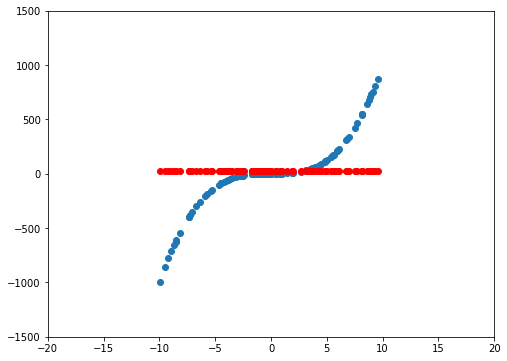

In [9]:
EPOCHS = 800

#trials = MongoTrials('mongo://localhost:27017/trials_poly/jobs', exp_key='experiment_1')
trials = Trials()
best = fmin(build_model_hopt, space, algo=tpe.suggest, max_evals = 3, trials=trials)


print('best_model_is ...')
print(best)

best_model = keras.Sequential()
best_model.add(keras.layers.Dense(unit_numbers[best['units_1']], 
                                  activation=unit_activations[best['units_1_activation']],
                                  input_shape=(post_train_data_0.shape[1],), kernel_constraint=maxnorm(3)))
best_model.add(keras.layers.Dropout(best['dropout_1']))
best_model.add(keras.layers.Dense(unit_numbers[best['units_2']], 
                                  activation=unit_activations[best['units_2_activation']], 
                                  kernel_constraint=maxnorm(3)))

if best['layers_number'] == 1:
    best_model.add(keras.layers.Dense(unit_numbers[best['units_3']], init = "glorot_normal")) 
    best_model.add(keras.layers.Dropout(best['dropout_3']))

if best['layers_number'] == 2:
    best_model.add(keras.layers.Dense(unit_numbers[best['units_4']], init = "glorot_normal")) 
    best_model.add(keras.layers.Dropout(best['dropout_4']))
    
if best['layers_number'] == 3:
    best_model.add(keras.layers.Dense(unit_numbers[best['units_5']], init = "glorot_normal")) 
    best_model.add(keras.layers.Dropout(best['dropout_5']))

best_model.add(keras.layers.Dense(1))


best_model.compile(loss='mse',
            optimizer=optimizers[best['optimizer']],
            metrics=['mae'])


best_model.fit(post_train_data_0, train_labels_0, epochs=EPOCHS,
                validation_split=0.2, verbose=1)

predicted_0 = best_model.predict(train_data_0).reshape(data_points, 1)


plt.figure(figsize=(8,6))

plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_0, train_labels_0_pre)
plt.scatter(train_data_0, predicted_0, c='red')

plt.savefig('best.eps', format='eps', dpi=1000)


In [31]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_263 (Dense)            (None, 8)                 16        
_________________________________________________________________
dropout_110 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_264 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_265 (Dense)            (None, 8)                 24        
_________________________________________________________________
dropout_111 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_266 (Dense)            (None, 1)                 9         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [30]:
predicted_0 = best_model.predict(train_data_0).reshape(data_points, 1)
    
acc = np.sum(np.abs(predicted_0 - train_labels_0_pre))
print(acc)

2076390.4490338224


In [69]:
test_data = np.random.uniform(-10, 10, data_points)

mu_train_0, sigma_train_0 = 0, 0
noise_train_0 = np.random.normal(mu_train_0, sigma_train_0, data_points)

train_labels_0_pre = np.power(train_data_0, 3) + noise_train_0

{'dropout_1': 1,
 'dropout_4': 2,
 'layers_number': 2,
 'optimizer': 0,
 'units_1': 23,
 'units_1_activation': 1,
 'units_2': 20,
 'units_2_activation': 0,
 'units_4': 13,
 'units_4_activation': 2}

In [15]:
test_data = np.random.uniform(10, 15, 5)
test_label = np.power(test_data, 3)

preds = best_model.predict(test_data).reshape(5, 1)
error = np.sum(np.abs(preds - test_label))


62169.289558433135


### Old stuff

In [10]:
def build_model(train_data):
    model = keras.Sequential([
       keras.layers.Dense(2, input_shape=(train_data.shape[1],)),
       keras.layers.Dense(6, activation= tf.keras.activations.sigmoid, input_shape=(train_data.shape[1],)),
       keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.5)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

In [11]:
model_0 = build_model(post_train_data_0)
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


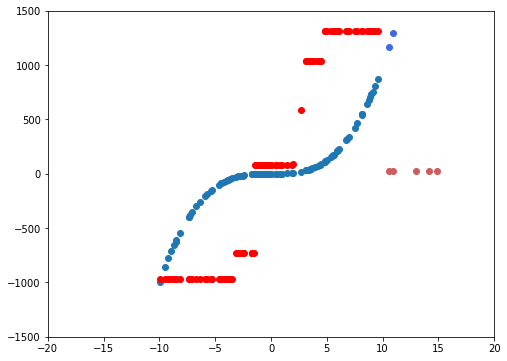

In [18]:
EPOCHS = 1500

# Store training stats
history_0 = model_0.fit(post_train_data_0, train_labels_0, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size=30)

predicted_0 = model_0.predict(train_data_0).reshape(data_points, 1)


plt.figure(figsize=(8,6))

plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_0, train_labels_0_pre)
plt.scatter(train_data_0, predicted_0, c='red')


test_data = np.random.uniform(10, 15, 5)
test_label = np.power(test_data, 3)

preds = best_model.predict(test_data).reshape(5, 1)
error = np.sum(np.abs(preds - test_label))

plt.scatter(test_data, test_label, c='royalblue')
plt.scatter(test_data, preds, c='indianred')

plt.savefig('old.eps', format='eps', dpi=1000)


### A uniform distribution with Guassian noise (0, 50)

In [13]:
np.sum(np.abs(predicted_0 - train_labels_0_pre))

6284396.917610099

In [19]:
error

53415.20259774194

In [137]:
train_data_1 = np.random.uniform(-10, 10, 100)

mu_train_1, sigma_train_1 = 0, 50
noise_train_1 = np.random.normal(mu_train_1, sigma_train_1, 100)

train_labels_1_pre = np.power(train_data_1, 3) + noise_train_1

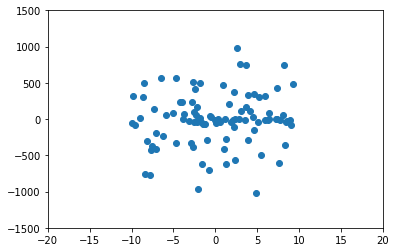

In [138]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_1)
plt.show()

In [141]:
order = np.argsort(np.random.random(train_labels_1.shape))

pre_train_data_1 = np.array(train_data_1[order]).reshape(100, 1)
train_labels_1 = np.array(train_labels_1_pre[order]).reshape(100, 1)

mean = pre_train_data_1.mean(axis=0)
std = pre_train_data_1.std(axis=0)

post_train_data_1 = (pre_train_data_1 - mean) / std

/Users/amirrahnama/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [142]:
model_1 = build_model(post_train_data_1)
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [143]:
EPOCHS = 500

# Store training stats
history_1 = model_1.fit(post_train_data_1, train_labels_1, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)

In [30]:
predicted = model_1.predict(train_data_1).reshape(100, 1)

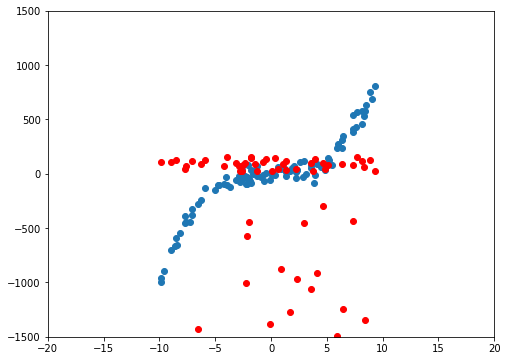

In [144]:
plt.figure(figsize=(8,6))

plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_1_pre)
plt.scatter(train_data_1, predicted, c='red')
plt.show()


### Add more data to the same model

In [84]:
mu_train_2, sigma_train_2 = 0, 100

noise_train_2 = np.random.normal(mu_train_2, sigma_train_2, 100)
train_labels_2 = np.power(train_data_1, 3) + noise_train_2

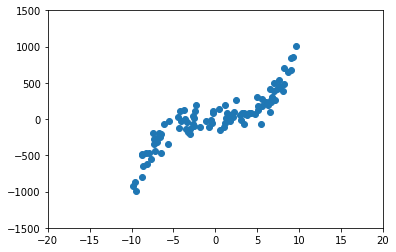

In [86]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_2)
plt.show()

In [87]:
order = np.argsort(np.random.random(train_labels_1.shape))
train_labels_2 = np.array(train_labels_2[order]).reshape(100, 1)

In [88]:
model_2 = build_model(post_train_data_1)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [89]:
EPOCHS = 500

# Store training stats
history_2 = model_2.fit(post_train_data_1, train_labels_2, epochs=EPOCHS,
                    validation_split=0.2, verbose=0)

In [90]:
predicted_2 = model_2.predict(train_data_1).reshape(100, 1)

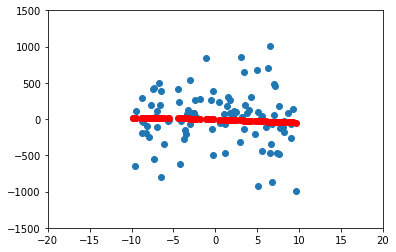

In [91]:
plt.xlim(-20, 20)
plt.ylim(-1500, 1500)
plt.scatter(train_data_1, train_labels_2)
plt.scatter(train_data_1, predicted_2, c='red')
plt.show()

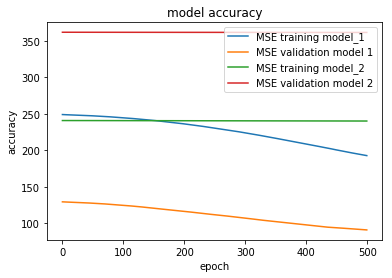

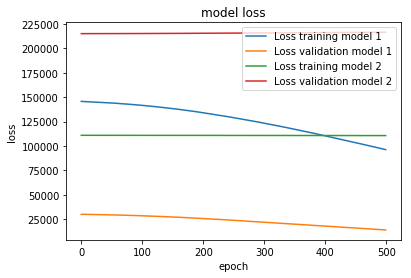

In [92]:
plt.plot(history_1.history['mean_absolute_error'], label= "MSE training model_1")
plt.plot(history_1.history['val_mean_absolute_error'], label= "MSE validation model 1")
plt.plot(history_2.history['mean_absolute_error'], label= "MSE training model_2")
plt.plot(history_2.history['val_mean_absolute_error'], label= "MSE validation model 2")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history_1.history['loss'], label="Loss training model 1")
plt.plot(history_1.history['val_loss'], label="Loss validation model 1")
plt.plot(history_2.history['loss'], label="Loss training model 2")
plt.plot(history_2.history['val_loss'], label="Loss validation model 2")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [52]:
x = train_data_0
y=train_labels_0_pre
z = np.polyfit(train_data_0, train_labels_0_pre, 10)
#p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 20))

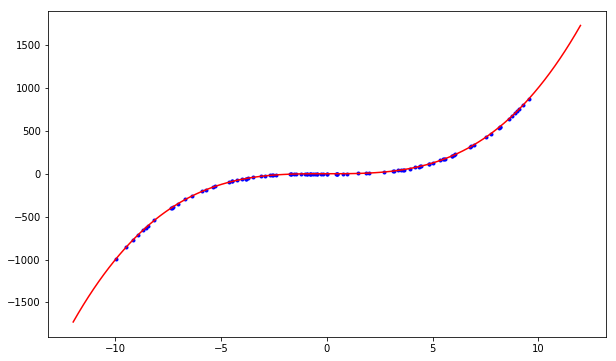

In [62]:
xp = np.linspace(-12, 12, 100)
plt.figure(figsize=(10,6))
#plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--', c)
plt.plot(x, y, '.', c="blue")
plt.plot(xp, p(xp), '-', c="red")
#plt.plot(xp, p30(xp), '--', c="red")
plt.savefig('curve_fitting.eps', format='eps', dpi=1000)

In [94]:
np.mean(history_2.history['mean_absolute_error'])

240.6719835479736

In [80]:
model_1.count_params()

193

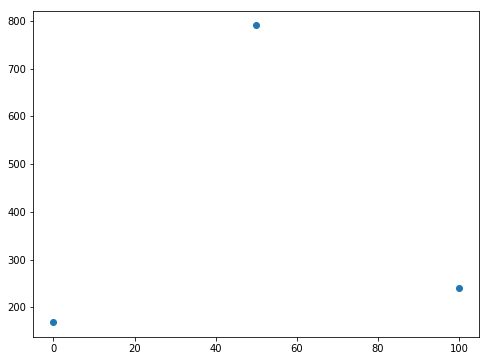

In [132]:
x = [np.mean(history_0.history['mean_absolute_error']), 
     np.mean(history_1.history['mean_absolute_error']), 
     np.mean(history_2.history['mean_absolute_error'])]

y = [sigma_train_0, sigma_train_1, sigma_train_2]

plt.figure(figsize=(8,6))

plt.scatter(y, x)
plt.show()

100/100 [==============================] - 0s 2ms/step


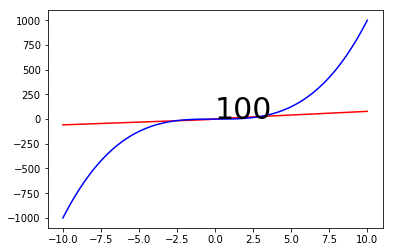

500/500 [==============================] - 0s 407us/step


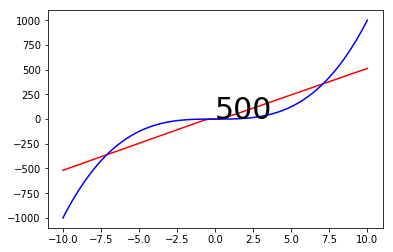

1000/1000 [==============================] - 0s 232us/step


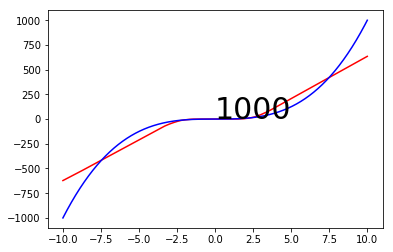

2000/2000 [==============================] - 0s 120us/step


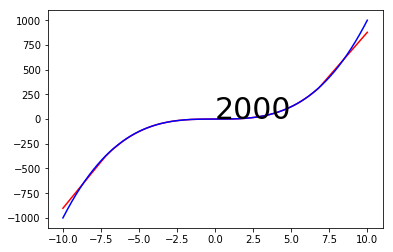

3000/3000 [==============================] - 0s 82us/step


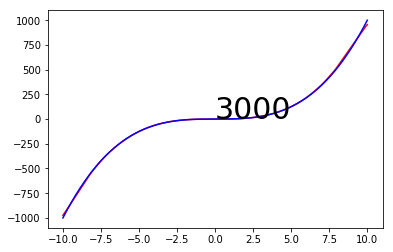

4000/4000 [==============================] - 0s 66us/step


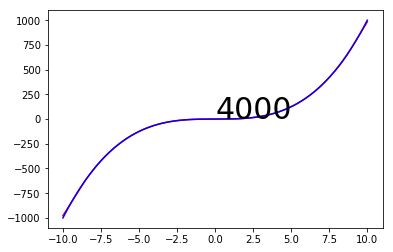

5000/5000 [==============================] - 0s 61us/step


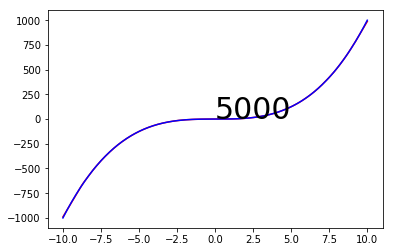

6000/6000 [==============================] - 0s 54us/step


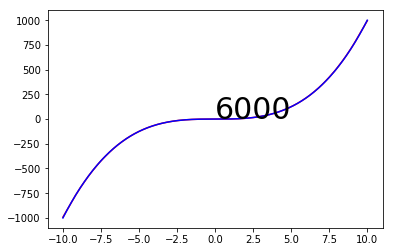

7000/7000 [==============================] - 0s 46us/step


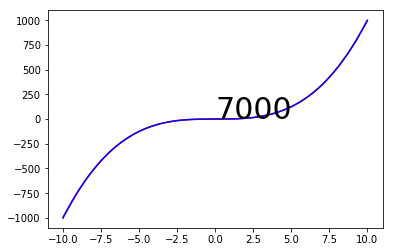

In [7]:
import numpy as np

data = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
d= 100
for d in data: 
    plt.figure()
    ax = plt.subplot(111)

    #x_train=np.random.rand(d)
    x_train=np.linspace(-10, 10, d)
    #y_train=x_train**4+x_train**3-x_train
    y_train=x_train**3
    x_train=x_train.reshape(len(x_train),1)

    x_test=np.linspace(-10,10, d)
    #y_test=x_test**4+x_test**3-x_test
    y_test=x_test**3
    x_test=x_test.reshape(len(x_test),1)


    model = Sequential()
    model.add(Dense(units=200, input_dim=1))
    model.add(Activation('relu'))
    model.add(Dense(units=45))
    model.add(Activation('relu'))
    model.add(Dense(units=1))

    model.compile(loss='mean_absolute_error',
                  optimizer='adam')

    model.fit(x_train, y_train, epochs=40, batch_size=50, verbose=0)

    loss_and_metrics = model.evaluate(x_test, y_test, batch_size=100)

    classes = model.predict(x_test, batch_size=1)

    test=x_test.reshape(-1)
    plt.plot(test,classes,c='r')
    plt.plot(test,y_test,c='b')
    plt.text(0.5, 0.5, str(d), transform=ax.transAxes, fontsize=30)
    plt.show()
    #plt.savefig('./' + str(d) + '.png')

In [28]:
2**3

8